In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
happiness = pd.read_csv("/content/drive/MyDrive/diplomado/visualizacion_datos_python/Happiness_report.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [101]:
mexico=happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


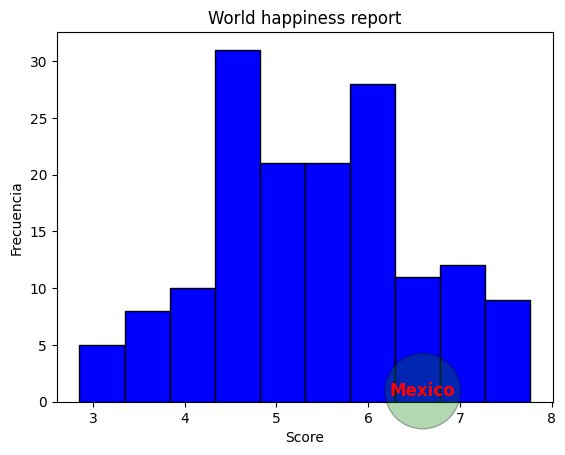

In [150]:
plt.hist(happiness['Score'], bins=10, color='blue', edgecolor='black')
smexico=mexico.loc['Mexico', 'Score']
props_bbox={'boxstyle': 'circle','facecolor': 'green','alpha': 0.3}
plt.text(smexico, 0.5, 'Mexico',bbox=props_bbox,horizontalalignment='center', color='red',fontsize=12,fontweight='bold')
plt.xlabel('Score'), plt.ylabel('Frecuencia'),plt.title('World happiness report')
plt.show()

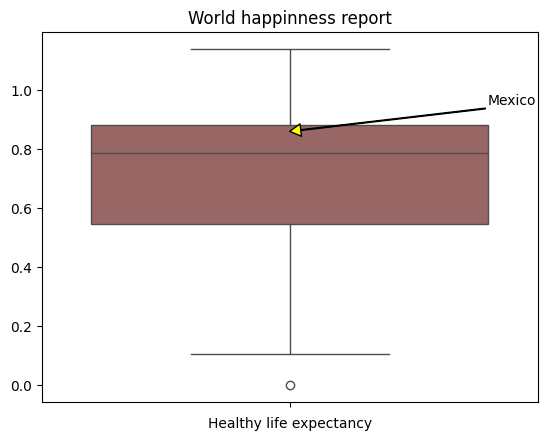

In [148]:
sns.boxplot(y='Healthy life expectancy',data=happiness,color= 'red', saturation=0.2)
hmexico=mexico.loc['Mexico', 'Healthy life expectancy']
props_bbox={'boxstyle': 'square','facecolor': 'green','alpha': 0.3}
plt.xlabel('Healthy life expectancy'), plt.ylabel(''),plt.title('World happinness report')
props_arrow = {'facecolor': 'yellow','width':0.5,'headwidth':9,'headlength':8}
plt.annotate('Mexico', xy=(0.0,hmexico),xytext=(0.4,.95),arrowprops=props_arrow )
plt.show()

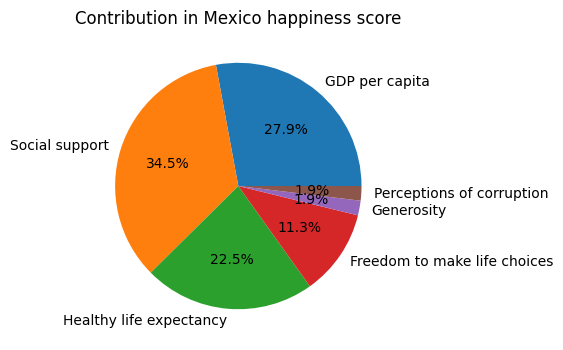

In [147]:
mexicoscore=mexico.drop(columns=['Score','Overall rank'])
x=mexicoscore.T
x.plot.pie(y='Mexico',labels=x.index,autopct='%1.1f%%',figsize=(4,4)).get_legend().remove()#.legend(loc='center right', bbox_to_anchor=(-0.0, 0.3))
plt.xlabel(''), plt.ylabel(''),plt.title('Contribution in Mexico happiness score')
plt.show()

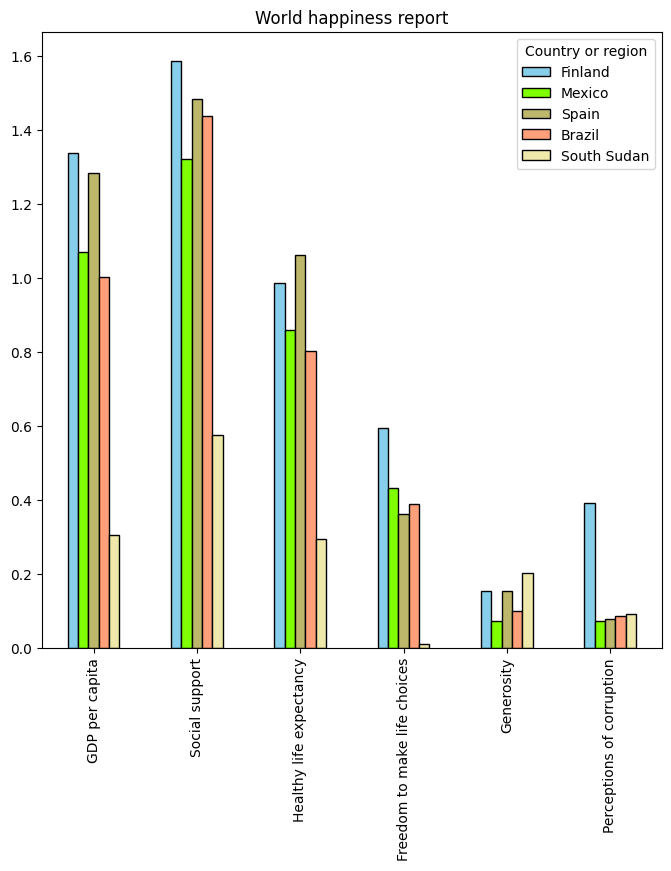

In [146]:
felices=happiness.loc[happiness['Score'].idxmax(), 'Country or region']
tristes=happiness.loc[happiness['Score'].idxmin(), 'Country or region']
animo=happiness.drop(columns=['Score','Overall rank'])
paises=animo[animo['Country or region'].isin([felices, tristes, 'Mexico', 'Spain', 'Brazil'])]
y=paises.set_index('Country or region').T
y.plot(kind='bar', figsize=(8, 8),color=['skyblue','chartreuse','darkkhaki','lightsalmon','palegoldenrod'], edgecolor='black')
plt.xlabel(''), plt.ylabel(''),plt.title('World happiness report')
plt.xticks(rotation=90)
plt.legend(title='Country or region')
plt.show()

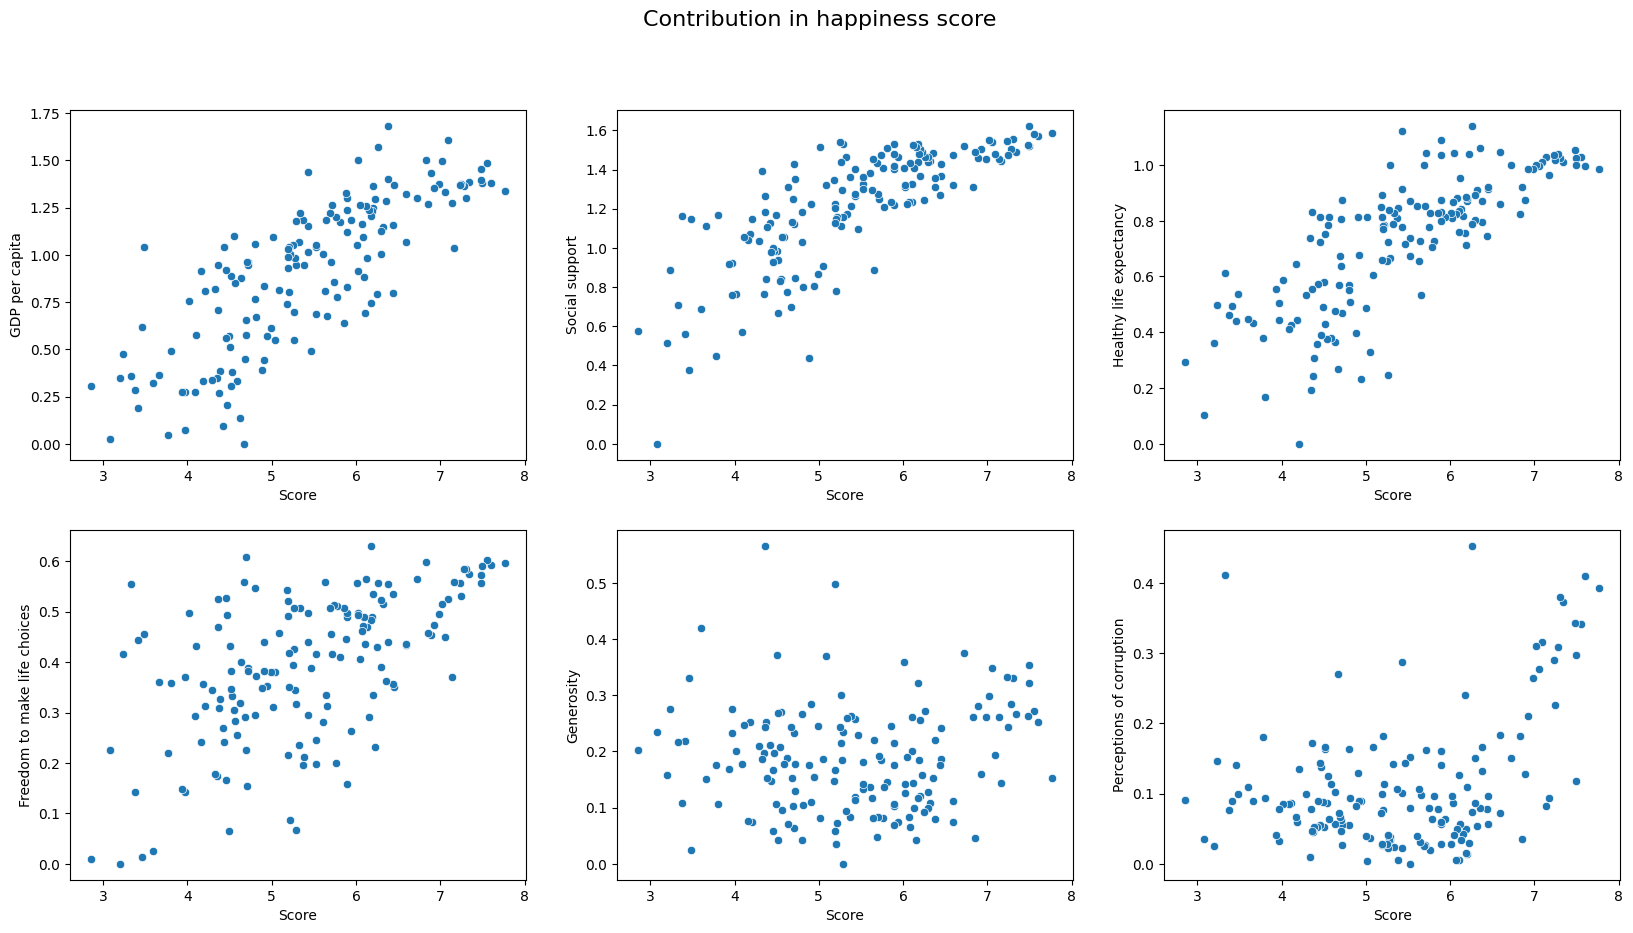

In [106]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Contribution in happiness score', fontsize=16)
ax1 = fig.add_subplot(231)
sns.scatterplot(x='Score', y='GDP per capita',data=happiness,ax=ax1)
ax2 = fig.add_subplot(232)
sns.scatterplot(x='Score', y='Social support',data=happiness,ax=ax2)
ax3 = fig.add_subplot(233)
sns.scatterplot(x='Score', y='Healthy life expectancy',data=happiness,ax=ax3)
ax4 = fig.add_subplot(234)
sns.scatterplot(x='Score', y='Freedom to make life choices',data=happiness,ax=ax4)
ax5 = fig.add_subplot(235)
sns.scatterplot(x='Score', y='Generosity',data=happiness,ax=ax5)
ax6 = fig.add_subplot(236)
sns.scatterplot(x='Score', y='Perceptions of corruption',data=happiness,ax=ax6)
plt.show()

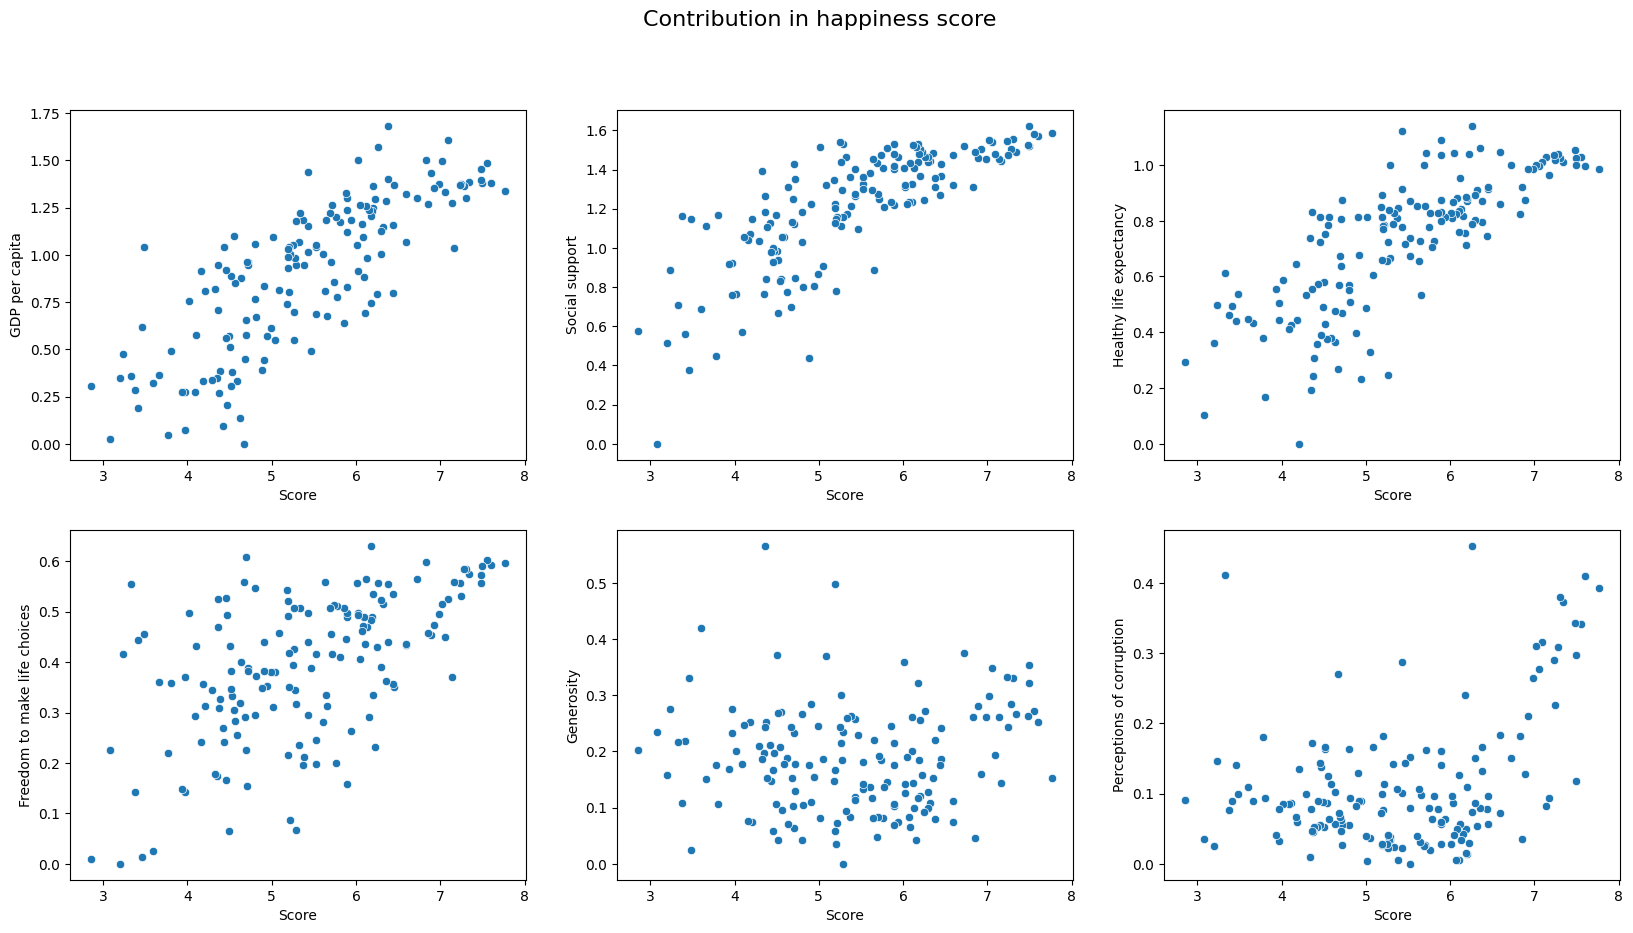

In [145]:
# Se puede obtener el mismo resultado con un for
fig=plt.figure(figsize=(20,10))
fig.suptitle('Contribution in happiness score', fontsize=16)
params=happiness.drop(columns=['Overall rank', 'Country or region']).columns[1:]
for i, columna in enumerate(params, start=1): # se obtiene la posicion y  el valor en la lista de columnas, empezando desde 1
    ax = fig.add_subplot(2,3,i)
    sns.scatterplot(x='Score',y=columna,data=happiness,ax=ax)
plt.show()

<Axes: >

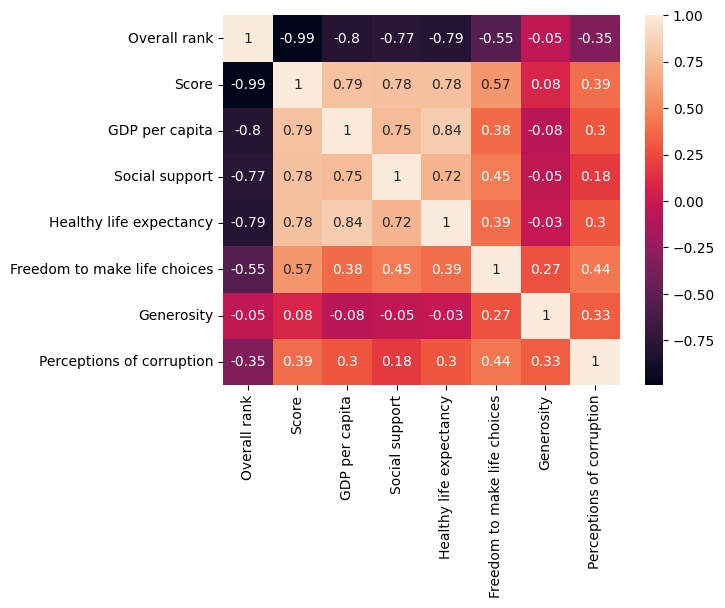

In [108]:
c=happiness.drop(columns=['Country or region'])
sns.heatmap(round(c.corr(),2),annot=True)

In [109]:
metadata = pd.read_csv("/content/drive/MyDrive/diplomado/visualizacion_datos_python/Metadata.csv")
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [121]:
happinessre=happiness.rename(columns={'Country or region': 'TableName'})
union=pd.merge(happinessre, metadata, on='TableName')

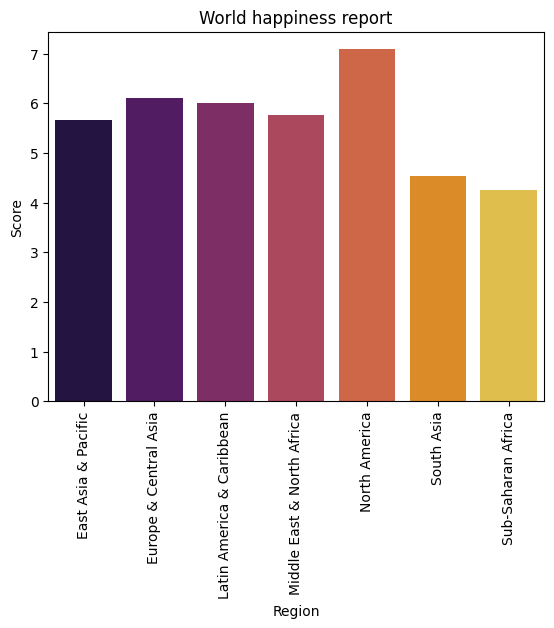

In [143]:
felizprom=union.groupby('Region')['Score'].mean().reset_index()
sns.barplot(x='Region', y='Score', data=felizprom, hue='Region', palette='inferno', legend=False)
plt.xlabel('Region'),plt.ylabel('Score') ,plt.title('World happiness report')
plt.xticks(rotation=90)
plt.show()